# Autoencoder

Autoencoding is a data compression and decompression algorithm implemented with an Artificial Neural Network (ANN)

#### A one-layer autoencoder

In [43]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

###### Preprocess the data

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist


(x_train, _), (x_test, _) = fashion_mnist.load_data() # No labels needed

# Normalize and flatten the input
x_train, x_test  = x_train / 255. , x_test / 255.
x_train = x_train.reshape([x_train.shape[0], np.prod(x_train.shape[1:])])
x_test = x_test.reshape([x_test.shape[0], np.prod(x_test.shape[1:])])

In [89]:
image_dim = np.prod(x_train.shape[1:]) # 28 * 28
encoding_dims = 64  # length of encoded items

##### Construct encoder and autoencoder

In [90]:
input_image = tf.keras.layers.Input(shape=(image_dim, ))
encoded_img = tf.keras.layers.Dense(units=encoding_dims, activation='relu',
                                   activity_regularizer=tf.keras.regularizers.l2(1e-4),
                                   )(input_image)
encoder = tf.keras.models.Model(input_image, encoded_img)

# lossy recostruction of input (Decoding)
decoded_img = tf.keras.layers.Dense(units=image_dim, activation='sigmoid')(encoded_img)
auto_encoder = tf.keras.models.Model(input_image, decoded_img)

- [X] The autoencoder maps an input image to its reconstruction

##### Construct the decoder

In [91]:
encoded_input = tf.keras.layers.Input(shape=(encoding_dims, ))
decoding_layer = auto_encoder.layers[-1] # last autoencoder layer
decoder = tf.keras.models.Model(encoded_input, decoding_layer(encoded_input))

##### compile the autoencoder

In [92]:
auto_encoder.compile(optimizer='adadelta', loss='binary_crossentropy')



##### add checkpoints

In [93]:
model_path = '.model_autoencoder.weights.hdf5'

# save after every epoch
checkpnt_1 = tf.keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)

checkpnt_2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              min_delta=1e-4,
                                              patience=3,
                                              verbose=2)

- The first checkpoint saves the best model after every epoch.
- The second checkpoint stops the training when the validation loss is less than min_delta.
If this happens for `patience` number of epochs, training is halted

##### train

In [98]:
# encode and decode the test data

# encode
encoded_images = encoder.predict(x_test)

# decode
decoded_images = decoder.predict(encoded_images)


In [99]:
epochs = 64

auto_encoder.fit(x_train, x_train, epochs=epochs, batch_size=256,
                 validation_data=(x_test, x_test),
                callbacks=[checkpnt_1, checkpnt_2])

Train on 60000 samples, validate on 10000 samples
Epoch 1/64
59904/60000 [============================>.] - ETA: 0s - loss: 0.6942
Epoch 00001: val_loss improved from 0.69430 to 0.69405, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6942 - val_loss: 0.6940
Epoch 2/64
59392/60000 [============================>.] - ETA: 0s - loss: 0.6939
Epoch 00002: val_loss improved from 0.69405 to 0.69380, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6939 - val_loss: 0.6938
Epoch 3/64
59136/60000 [============================>.] - ETA: 0s - loss: 0.6937
Epoch 00003: val_loss improved from 0.69380 to 0.69356, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6937 - val_loss: 0.6936
Epoch 4/64
59392/60000 [============================>.] - ETA: 0s - loss: 0.6935
Epoch 00004: val_loss impr

Epoch 30/64
59648/60000 [============================>.] - ETA: 0s - loss: 0.6881
Epoch 00030: val_loss improved from 0.68823 to 0.68802, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6881 - val_loss: 0.6880
Epoch 31/64
59136/60000 [============================>.] - ETA: 0s - loss: 0.6879
Epoch 00031: val_loss improved from 0.68802 to 0.68780, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6879 - val_loss: 0.6878
Epoch 32/64
59136/60000 [============================>.] - ETA: 0s - loss: 0.6877
Epoch 00032: val_loss improved from 0.68780 to 0.68759, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6877 - val_loss: 0.6876
Epoch 33/64
59904/60000 [============================>.] - ETA: 0s - loss: 0.6875
Epoch 00033: val_loss improved from 0.68759 to 0.68736, saving model to 

59136/60000 [============================>.] - ETA: 0s - loss: 0.6802
Epoch 00059: val_loss improved from 0.68035 to 0.67999, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.6802 - val_loss: 0.6800
Epoch 60/64
59904/60000 [============================>.] - ETA: 0s - loss: 0.6798
Epoch 00060: val_loss improved from 0.67999 to 0.67963, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.6798 - val_loss: 0.6796
Epoch 61/64
59136/60000 [============================>.] - ETA: 0s - loss: 0.6795
Epoch 00061: val_loss improved from 0.67963 to 0.67926, saving model to .model_autoencoder.weights.hdf5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.6795 - val_loss: 0.6793
Epoch 62/64
59392/60000 [============================>.] - ETA: 0s - loss: 0.6791
Epoch 00062: val_loss improved from 0.67926 to 0.67888, saving model to .model_autoe

In [100]:
# load the best model
auto_encoder.load_weights(model_path)

encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

##### display the output

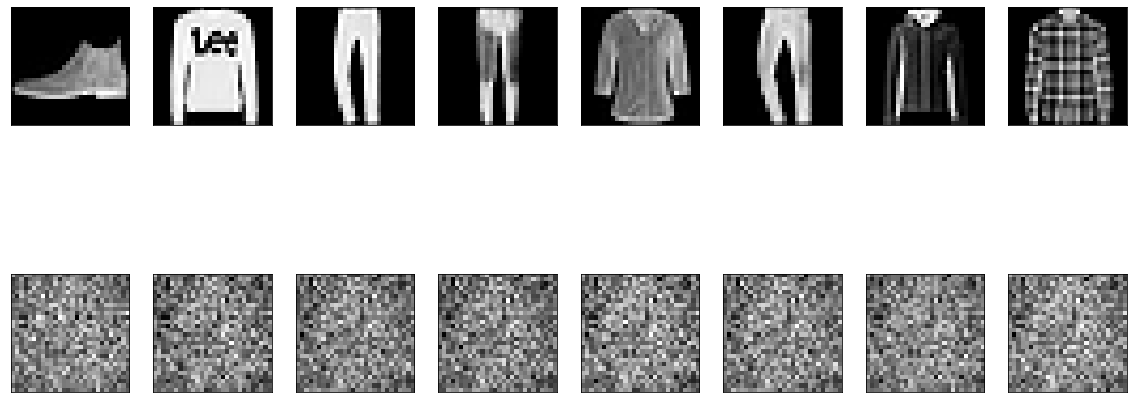

In [101]:
n_display_items = 8


plt.figure(figsize=(20, 9))

for i in range(n_display_items):
    # Before compression
    
    graph = plt.subplot(2, n_display_items, i + 1)
    plt.imshow(x_test[i].reshape([28, 28]))
    
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)
    
    # After compression
    
      
    graph = plt.subplot(2, n_display_items, i + 1 + n_display_items)
    plt.imshow(decoded_images[i].reshape([28, 28]))
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)
  

plt.show()